# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Briyan Bayu Pangestu
- **Email:** bryanazza836@gmail.com
- **ID Dicoding:** bryan231

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
  Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit terjadi?
- Pertanyaan 2
  Pada musim apa penyewaan sepeda paling banyak terjadi?

## Import Semua Packages/Library yang Digunakan

In [62]:
# Memanggil library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [63]:
# Memuat dataset 'day.csv' dan 'hour.csv'
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

**Insight:**
- Dataset berhasil dimuat ke dalam DataFrame day_df dan hour_df.

### Assessing Data

In [64]:
# Menampilkan informasi dataset day_df
day_df.info()

# Menampilkan informasi dataset hour_df
hour_df.info()

# Mengecek missing values di day_df
print("Missing values in day_df:")
print(day_df.isnull().sum())

# Mengecek missing values di hour_df
print("\nMissing values in hour_df:")
print(hour_df.isnull().sum())

# Mengecek duplikasi di day_df
print("\nJumlah duplikasi di day_df:", day_df.duplicated().sum())

# Mengecek duplikasi di hour_df
print("Jumlah duplikasi di hour_df:", hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Tidak terdapat missing values dan duplikasi dalam kedua dataset.
- Beberapa kolom memiliki tipe data yang perlu disesuaikan, seperti kolom dteday yang sebaiknya diubah menjadi tipe datetime, dan kolom kategori yang perlu diubah menjadi tipe kategori.

### Cleaning Data

In [65]:
# Mengubah tipe data 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengubah tipe data beberapa kolom menjadi kategori
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
for col in category_columns:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

# Mengganti nama kolom untuk meningkatkan keterbacaan
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weekday': 'day_of_week',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

# Mengonversi nilai kategori untuk interpretasi yang lebih baik
# Mapping untuk season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mapping untuk month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

# Mapping untuk day_of_week
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
    6: 'Saturday'
}
day_df['day_of_week'] = day_df['day_of_week'].map(weekday_mapping)
hour_df['day_of_week'] = hour_df['day_of_week'].map(weekday_mapping)

# Mapping untuk weather_situation
weather_mapping = {
    1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

# Mapping untuk year
year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

# Menambahkan kolom 'day_type' untuk membedakan antara weekday dan weekend
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

day_df['day_type'] = day_df['day_of_week'].apply(categorize_day)
hour_df['day_type'] = hour_df['day_of_week'].apply(categorize_day)

**Insight:**
- Tipe data kolom telah disesuaikan untuk memudahkan proses analisis.
- Nama kolom telah diganti agar lebih mudah dipahami.
- Nilai numerik pada kolom kategori telah dikonversi menjadi label yang lebih informatif.
- Penambahan Kolom 'day_type' untuk membedakan antara hari kerja dan akhir pekan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [66]:
# Menampilkan statistik deskriptif untuk day_df
print(day_df.describe(include='all'))

# Menampilkan statistik deskriptif untuk hour_df
print(hour_df.describe(include='all'))

           instant               dteday season    year month  holiday  \
count   731.000000                  731    731   731.0   731    731.0   
unique         NaN                  NaN      4     2.0    12      2.0   
top            NaN                  NaN   Fall  2012.0   Jan      0.0   
freq           NaN                  NaN    188   366.0    62    710.0   
mean    366.000000  2012-01-01 00:00:00    NaN     NaN   NaN      NaN   
min       1.000000  2011-01-01 00:00:00    NaN     NaN   NaN      NaN   
25%     183.500000  2011-07-02 12:00:00    NaN     NaN   NaN      NaN   
50%     366.000000  2012-01-01 00:00:00    NaN     NaN   NaN      NaN   
75%     548.500000  2012-07-01 12:00:00    NaN     NaN   NaN      NaN   
max     731.000000  2012-12-31 00:00:00    NaN     NaN   NaN      NaN   
std     211.165812                  NaN    NaN     NaN   NaN      NaN   

       day_of_week  workingday weather_situation        temp       atemp  \
count          731  731.000000               73

**Insight:**
- Statistik deskriptif memberikan gambaran tentang distribusi data, seperti nilai rata-rata, median, dan standar deviasi.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit terjadi?

<ipython-input-67-7b08465382ce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='total_count', data=hourly_counts, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

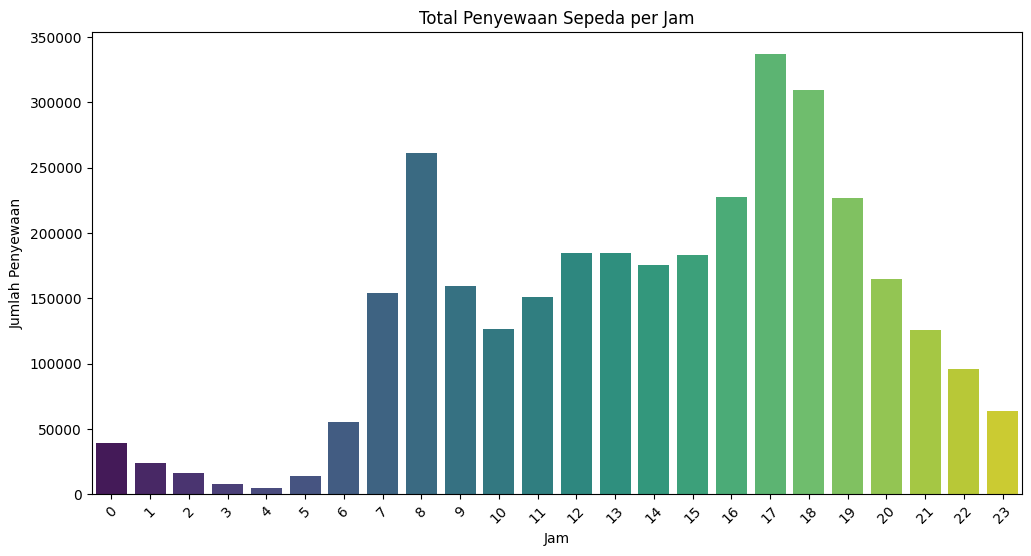

In [67]:
# Menghitung total penyewaan per jam
hourly_counts = hour_df.groupby('hour')['total_count'].sum().reset_index()

# Mengonversi jam ke integer untuk pengurutan
hourly_counts['hour'] = hourly_counts['hour'].astype(int)
hourly_counts.sort_values('hour', inplace=True)

# Visualisasi penyewaan per jam
plt.figure(figsize=(12,6))
sns.barplot(x='hour', y='total_count', data=hourly_counts, palette='viridis')
plt.title('Total Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Pada musim apa penyewaan sepeda paling banyak terjadi?

<ipython-input-68-a6f4bbaf6af3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = day_df.groupby('season')['total_count'].sum().reset_index()
<ipython-input-68-a6f4bbaf6af3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='total_count', data=season_counts, palette='autumn')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabor

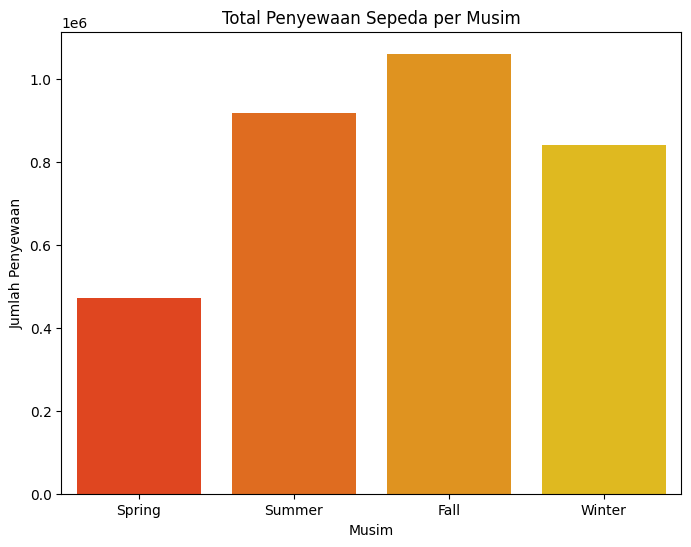

In [68]:
# Menghitung total penyewaan per musim
season_counts = day_df.groupby('season')['total_count'].sum().reset_index()

# Visualisasi penyewaan per musim
plt.figure(figsize=(8,6))
sns.barplot(x='season', y='total_count', data=season_counts, palette='autumn')
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Pertanyaan 1:

   Jam Paling Banyak Penyewaan: Jam 17:00 menunjukkan jumlah penyewaan tertinggi.
   
   Jam Paling Sedikit Penyewaan: Jam 04:00 memiliki jumlah penyewaan terendah.
   
   Interpretasi: Peningkatan pada jam 17:00 kemungkinan besar disebabkan oleh jam pulang kerja, sementara rendahnya penyewaan pada jam 04:00 disebabkan oleh aktivitas yang minim pada dini hari.

- Pertanyaan 2:

   Musim gugur memiliki jumlah penyewaan tertinggi.
   
   Interpretasi: Kondisi cuaca yang nyaman pada musim gugur mungkin mendorong lebih banyak orang untuk bersepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
   
   1.Penyewaan Tertinggi: Terjadi pada jam 17:00, kemungkinan karena jam pulang kerja dan aktivitas sore hari.
   
   2.Penyewaan Terendah: Terjadi pada jam 04:00, saat aktivitas masyarakat masih rendah.
   
   Rekomendasi: Menyediakan lebih banyak sepeda pada jam-jam sibuk dan mempertimbangkan pengurangan pada jam tidak sibuk untuk efisiensi.
   
- Conclution pertanyaan 2

   1.Musim Terbanyak Penyewaan: Musim gugur menunjukkan jumlah penyewaan tertinggi.
   
   2.Faktor Cuaca: Kondisi cuaca yang nyaman pada musim gugur mendorong peningkatan penyewaan.
   
   Rekomendasi: Meningkatkan promosi dan ketersediaan sepeda selama musim gugur untuk memaksimalkan pendapatan.